# Measure of Contribution to Model Performance and Deletion Robustness

## Data Quality

In machine learning, data quality plays an important role in determining model performance. A data source with lower data quality contains higher proportion of noises, therefore making a small contribution to both model performance and deletion robustness. We expect that DeRDaVa preserves the ability of semivalues to differentiate data sources with different data quality. In this experiment, we create data sources with varying data quality by first splitting a dataset into smaller subsets each representing a data source, and then adding different levels of synthetic noise to each data source. Moreover, we keep the staying probability of each data source constant at $0.9$ independently. A sample run is given below:

In [59]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from derdava.coalition_probability import IndependentCoalitionProbability
from derdava.data_source import generate_random_data_sources, add_classification_noise
from derdava.data_valuation import ValuableModel
from derdava.dataset import load_dataset
from derdava.model_utility import IClassificationModel, model_logistic_regression

X, y = load_dataset('phoneme')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:0.8 for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)

average_values = {}
average_noisy_values = {}
average_reverse_noisy_values = {}

model = model_logistic_regression

N = 100
for n_iter in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    y_train_copy = y_train.copy()
    y_train_copy = add_classification_noise(y_train_copy, noise_level = 0.225)
    data_sources = generate_random_data_sources(X_train, y_train_copy, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)
    noisy_data_sources = generate_random_data_sources(X_train, y_train, 
                                                      num_of_data_sources=NUM_OF_DATA_SOURCES)
    reverse_noisy_data_sources = generate_random_data_sources(X_train, y_train, 
                                                              num_of_data_sources=NUM_OF_DATA_SOURCES)
    for i in range(NUM_OF_DATA_SOURCES):
        noisy_data_sources[i] = (noisy_data_sources[i][0], 
                                 add_classification_noise(noisy_data_sources[i][1], noise_level = 0.05*i))
        reverse_noisy_data_sources[i] = (reverse_noisy_data_sources[i][0],
                                         add_classification_noise(reverse_noisy_data_sources[i][1], 
                                                                  noise_level = 0.45-0.05*i))

    print(f"=====> Iteration #{n_iter}")

    # no noise
    model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
    valuable_model = ValuableModel(support_set, model_utility_function)
    values = valuable_model.valuate(data_valuation_function="robust banzhaf", 
                                    coalition_probability=coalition_probability)
    
    for i in values:
        if average_values.get(i, 0) == 0:
            average_values[i] = []
        average_values[i].append(values[i])


    # increasing noise
    model_utility_function = IClassificationModel(model, noisy_data_sources, X_test, y_test)
    noisy_valuable_model = ValuableModel(support_set, model_utility_function)
    noisy_values = noisy_valuable_model.valuate(data_valuation_function="robust banzhaf", 
                                    coalition_probability=coalition_probability)
    
    for i in noisy_values:
        if average_noisy_values.get(i, 0) == 0:
            average_noisy_values[i] = []
        average_noisy_values[i].append(noisy_values[i])
        
    # decreasing noise
    model_utility_function = IClassificationModel(model, reverse_noisy_data_sources, X_test, y_test)
    reverse_noisy_valuable_model = ValuableModel(support_set, model_utility_function)
    reverse_noisy_values = reverse_noisy_valuable_model.valuate(data_valuation_function="robust banzhaf", 
                                    coalition_probability=coalition_probability)
    
    for i in reverse_noisy_values:
        if average_reverse_noisy_values.get(i, 0) == 0:
            average_reverse_noisy_values[i] = []
        average_reverse_noisy_values[i].append(reverse_noisy_values[i])

# get average
for i in average_values:
    average_values[i] = sum(list(sorted(average_values[i]))[25:75]) / 50
    average_noisy_values[i] = sum(list(sorted(average_noisy_values[i]))[25:75]) / 50
    average_reverse_noisy_values[i] = sum(list(sorted(average_reverse_noisy_values[i]))[25:75]) / 50
    
print(average_values)
print(average_noisy_values)
print(average_reverse_noisy_values)

=====> Iteration #0
=====> Iteration #1
=====> Iteration #2
=====> Iteration #3
=====> Iteration #4
=====> Iteration #5
=====> Iteration #6
=====> Iteration #7
=====> Iteration #8
=====> Iteration #9
=====> Iteration #10
=====> Iteration #11
=====> Iteration #12
=====> Iteration #13
=====> Iteration #14
=====> Iteration #15
=====> Iteration #16
=====> Iteration #17
=====> Iteration #18
=====> Iteration #19
=====> Iteration #20
=====> Iteration #21
=====> Iteration #22
=====> Iteration #23
=====> Iteration #24
=====> Iteration #25
=====> Iteration #26
=====> Iteration #27
=====> Iteration #28
=====> Iteration #29
=====> Iteration #30
=====> Iteration #31
=====> Iteration #32
=====> Iteration #33
=====> Iteration #34
=====> Iteration #35
=====> Iteration #36
=====> Iteration #37
=====> Iteration #38
=====> Iteration #39
=====> Iteration #40
=====> Iteration #41
=====> Iteration #42
=====> Iteration #43
=====> Iteration #44
=====> Iteration #45
=====> Iteration #46
=====> Iteration #47
==

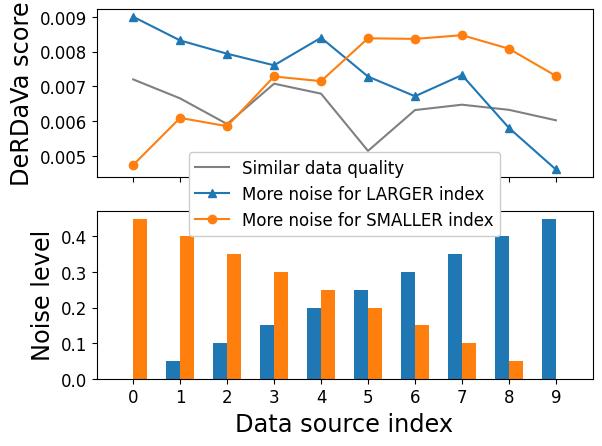

In [5]:
import numpy as np
import os

NUM_OF_DATA_SOURCES=10
average_values = {0: 0.00719929077330702, 1: 0.006654337877543765, 2: 0.005918315627324281, 3: 0.007076863409085072, 4: 0.006790208672355109, 5: 0.005147943220083837, 6: 0.006319666732823668, 7: 0.0064736960602909885, 8: 0.006326334546071507, 9: 0.006026236550471016}
average_noisy_values = {0: 0.008997390823378535, 1: 0.008317506606717625, 2: 0.007936582515847095, 3: 0.0076042676165918545, 4: 0.008395561361519099, 5: 0.007281367860715156, 6: 0.006716357246895182, 7: 0.007323772445672001, 8: 0.005807498796823668, 9: 0.0046141767477977744}
average_reverse_noisy_values = {0: 0.004743681555570892, 1: 0.006093793706771878, 2: 0.005857136129893949, 3: 0.0072829492652034455, 4: 0.007148999393381004, 5: 0.00837902847116152, 6: 0.008362192471753382, 7: 0.008468698037504304, 8: 0.008080376828212074, 9: 0.007299457251274962}

fig, ax = plt.subplots(2, sharex=True)
line, = ax[0].plot(average_values.values(), color="grey")
line.set_label("Similar data quality")
noisy_line, = ax[0].plot(average_noisy_values.values(), marker="^", color="C0")
noisy_line.set_label("More noise for LARGER index")
reverse_noisy_line, = ax[0].plot(average_reverse_noisy_values.values(), marker="o", color="C1")
reverse_noisy_line.set_label("More noise for SMALLER index")
ax[0].legend(loc="lower center", fontsize="large", bbox_to_anchor=(0.5,-0.4), facecolor='white', framealpha=1)
ax[0].set_ylabel("DeRDaVa score", fontsize='xx-large')
ax[1].set_xlabel("Data source index", fontsize='xx-large')
ax[1].set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax[1].set_ylabel("Noise level", fontsize='xx-large')
width = 0.3
multiplier = 0
x = np.arange(NUM_OF_DATA_SOURCES)
noises = [0.05*i for i in range(NUM_OF_DATA_SOURCES)]
reverse_noises = [(0.45 - 0.05*i) for i in range(NUM_OF_DATA_SOURCES)]
all_noises = [noises, reverse_noises]
for i in range(len(all_noises)):
    offset = width * multiplier
    ax[1].bar(x + offset - width/2, all_noises[i], width, color=f"C{i}")
    multiplier += 1
    
ax[0].tick_params(axis='both', labelsize='large')
ax[1].tick_params(axis='both', labelsize='large')
ax[0].set_zorder(ax[1].get_zorder()+1)
    
plt.show()
PATH_TO_IMAGES = "./images/data_quality/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "data_quality_10_phoneme_lr_banzhaf.png"), dpi=300, bbox_inches='tight')